# Visualize results of code metrics analyzer

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import os
import json

## Prepare data

Extract values from file

In [11]:
bumpy_data = {}
fpc_data = {}
lcom_data = {}

  
filepath = "public_analysis_results.json"
with open(filepath, "r") as file:
    json_object = json.load(file)
    projects = [{"project_id": key, **value} for key, value in json_object.items()]
    for project in projects:
        # bumpy road
        score = project["bumpy_score"]
        project_id = project["project_id"]
        bumpy_data[project_id] = score

        # fpc
        score = project["fpc_score"]
        project_id = project["project_id"]
        fpc_data[project_id] = score

        # lcom
        score = project["lcom5_score"]
        project_id = project["project_id"]
        lcom_data[project_id] = score

print(bumpy_data)
print(fpc_data)
print(lcom_data)


{'GISLab-ELTE_aegis': 22, 'gitextensions_gitextensions': 0}
{'GISLab-ELTE_aegis': 159, 'gitextensions_gitextensions': 0}
{'GISLab-ELTE_aegis': 0, 'gitextensions_gitextensions': 0}


Convert data

In [12]:
df_bumpy = pd.DataFrame.from_dict(bumpy_data, orient='index')
df_bumpy = df_bumpy.sort_index()

df_fpc = pd.DataFrame.from_dict(fpc_data, orient='index')
df_fpc = df_fpc.sort_index()

df_lcom = pd.DataFrame.from_dict(lcom_data, orient='index')
df_lcom = df_fpc.sort_index()

# Plot data
## Bumpy road code metrics
### Bar chart

<Figure size 1000x500 with 0 Axes>

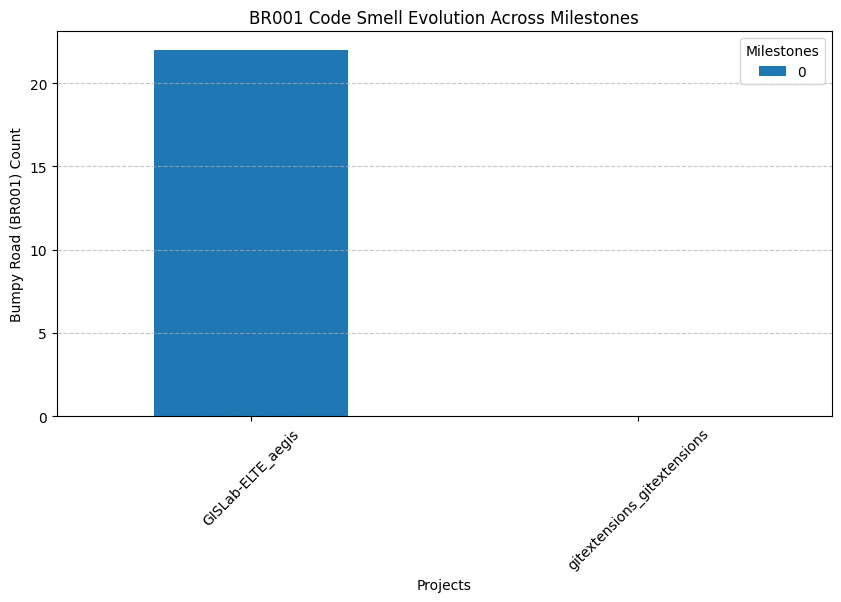

In [13]:
# Plot
plt.figure(figsize=(10, 5))
df_bumpy.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Bumpy Road (BR001) Count")
plt.title("BR001 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

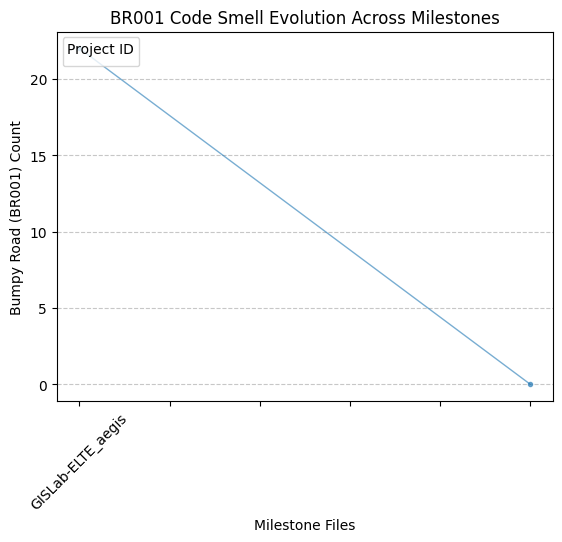

In [14]:
# Plot
plt.figure(figsize=(12, 6))
df_bumpy.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Bumpy Road (BR001) Count")
plt.title("BR001 Code Smell Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Heatmap

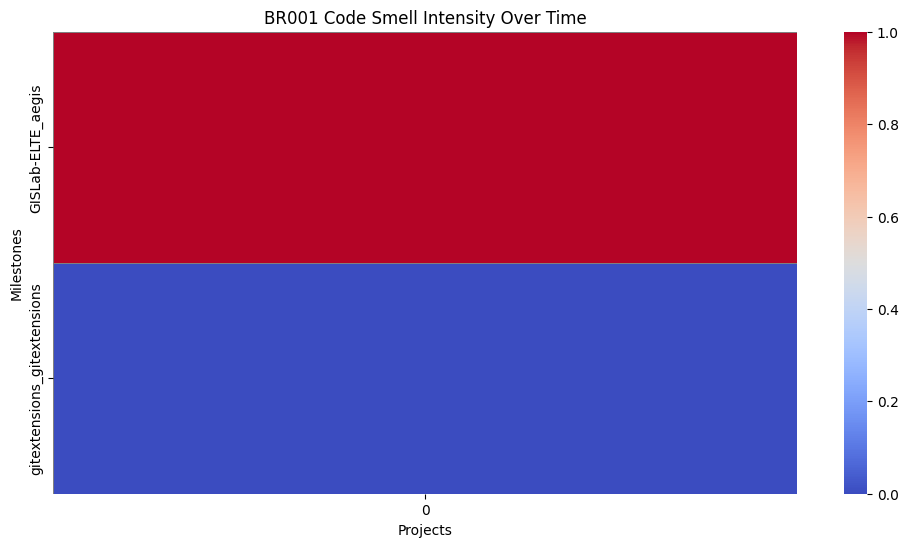

In [15]:
# Normalize values to improve visualization
df_normalized = df_bumpy / df_bumpy.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Milestones")
plt.title("BR001 Code Smell Intensity Over Time")

# Show plot
plt.show()

### Line chart 2

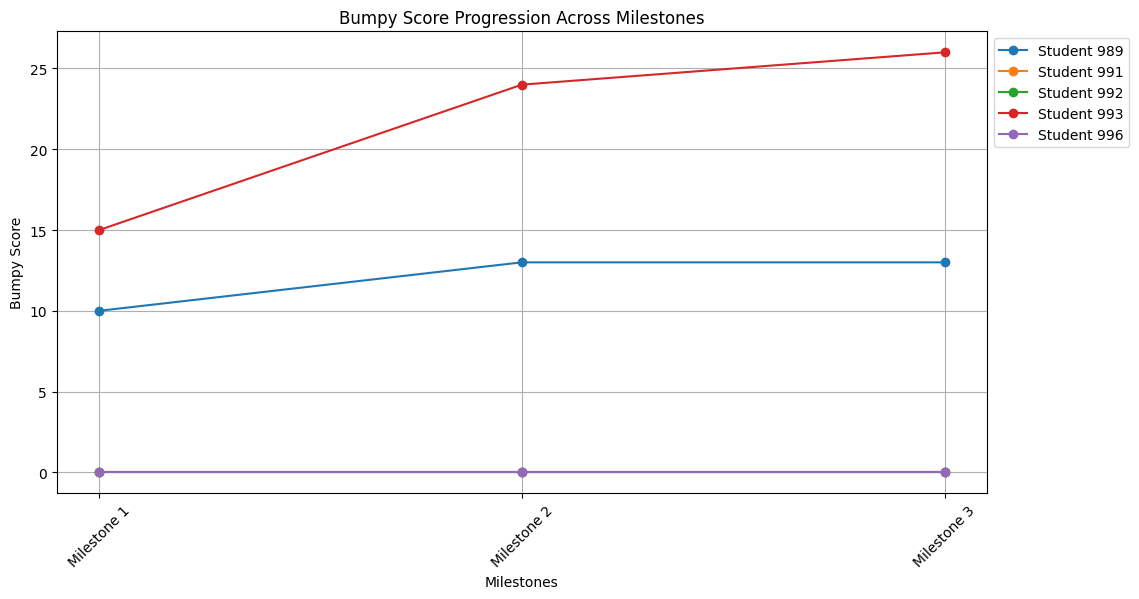

In [9]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_bumpy.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Student {student_id}")

plt.xlabel("Milestones")
plt.ylabel("Bumpy Score")
plt.title("Bumpy Score Progression Across Milestones")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

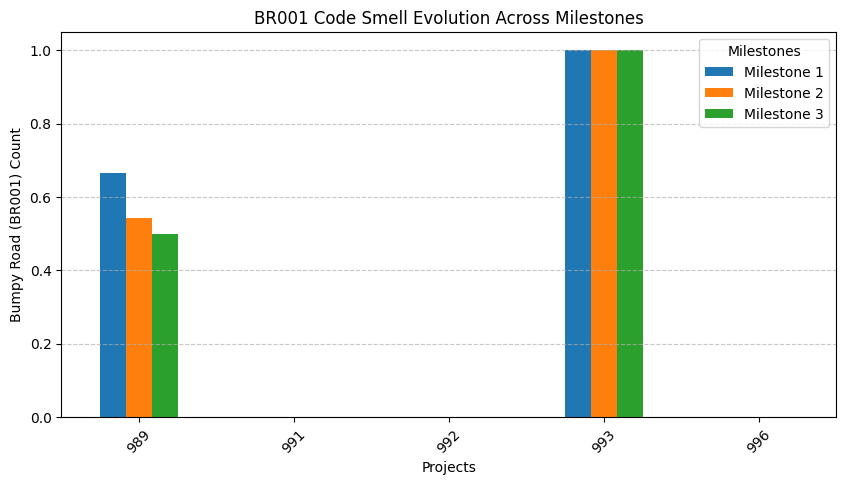

In [10]:
df_bumpy = df_bumpy / (df_bumpy.max() - df_bumpy.min())

# Plot
plt.figure(figsize=(10, 5))
df_bumpy.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Bumpy Road (BR001) Count")
plt.title("BR001 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## Function parameter count
### Bar chart

<Figure size 1000x500 with 0 Axes>

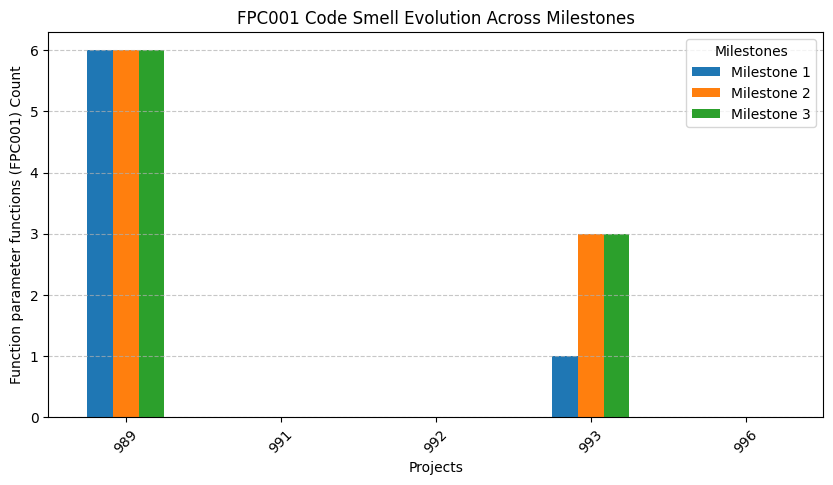

In [11]:
# Plot
plt.figure(figsize=(10, 5))
df_fpc.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Function parameter functions (FPC001) Count")
plt.title("FPC001 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

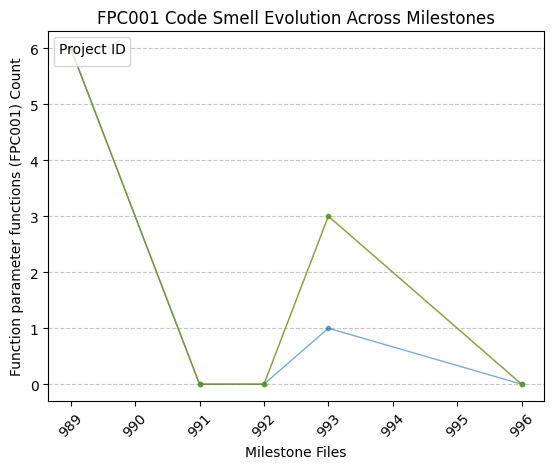

In [12]:
# Plot
plt.figure(figsize=(12, 6))
df_fpc.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Function parameter functions (FPC001) Count")
plt.title("FPC001 Code Smell Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Heatmap

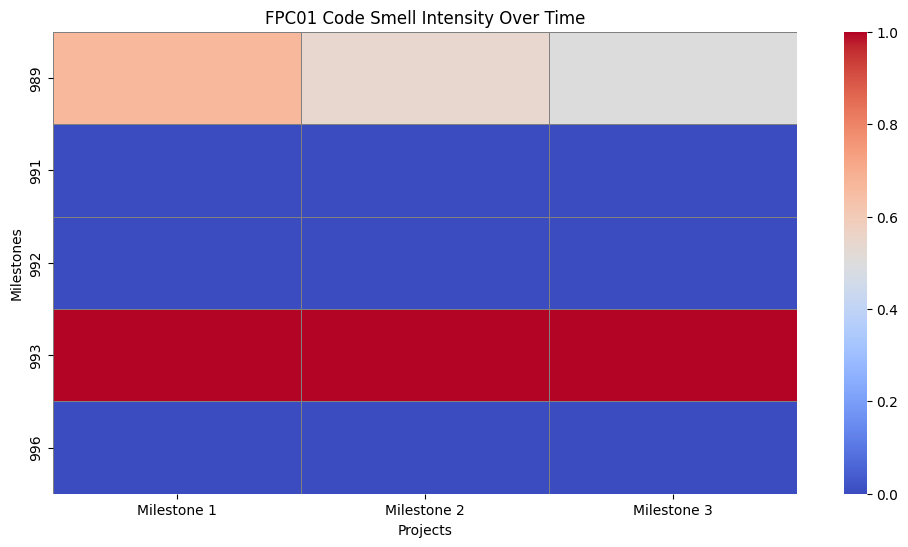

In [13]:
# Normalize values to improve visualization
df_normalized = df_bumpy / df_bumpy.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Milestones")
plt.title("FPC01 Code Smell Intensity Over Time")

# Show plot
plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

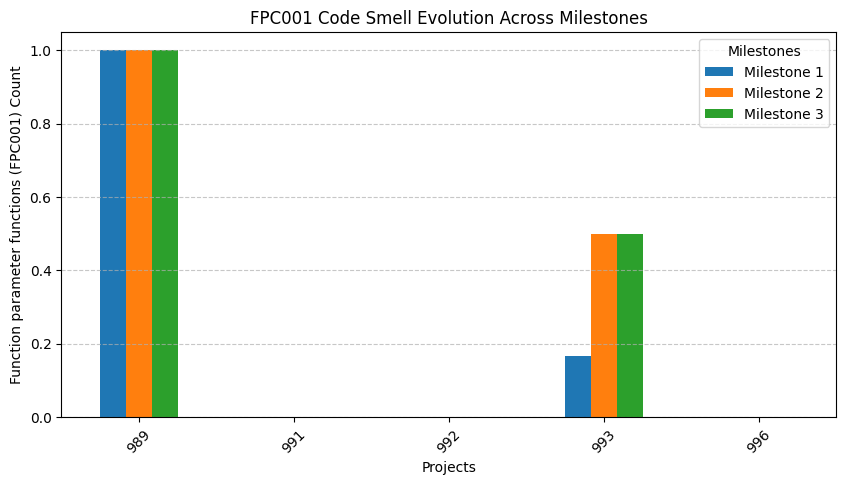

In [14]:
df_fpc = df_fpc / (df_fpc.max() - df_fpc.min())

# Plot
plt.figure(figsize=(10, 5))
df_fpc.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Function parameter functions (FPC001) Count")
plt.title("FPC001 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## LCOM5

### Bar chart

<Figure size 1000x500 with 0 Axes>

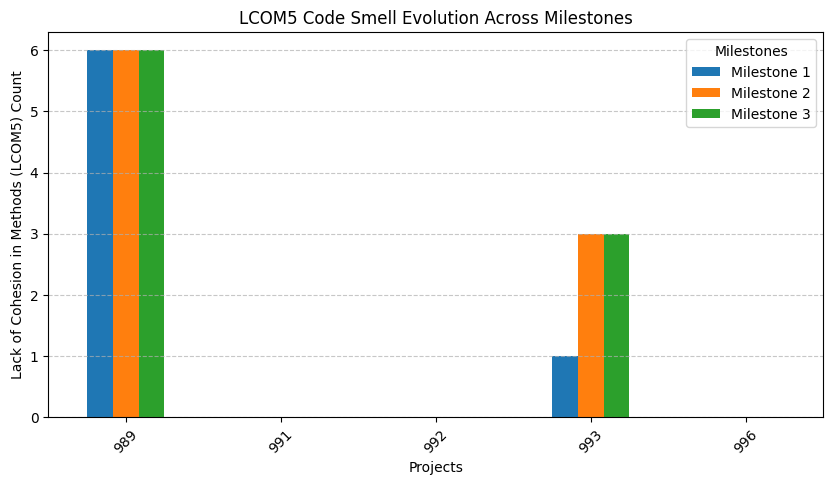

In [15]:
# Plot
plt.figure(figsize=(10, 5))
df_lcom.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Lack of Cohesion in Methods (LCOM5) Count")
plt.title("LCOM5 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

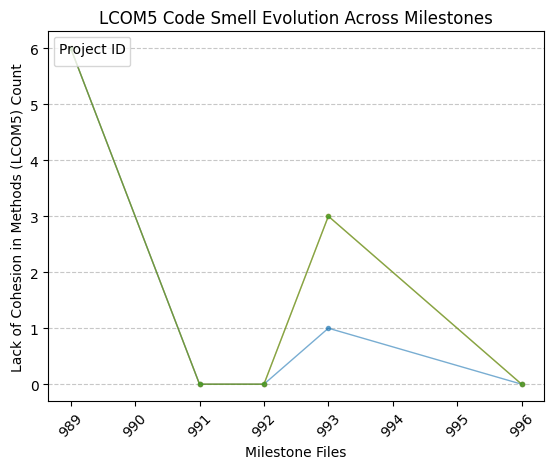

In [16]:
# Plot
plt.figure(figsize=(12, 6))
df_lcom.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Lack of Cohesion in Methods (LCOM5) Count")
plt.title("LCOM5 Code Smell Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Heatmap

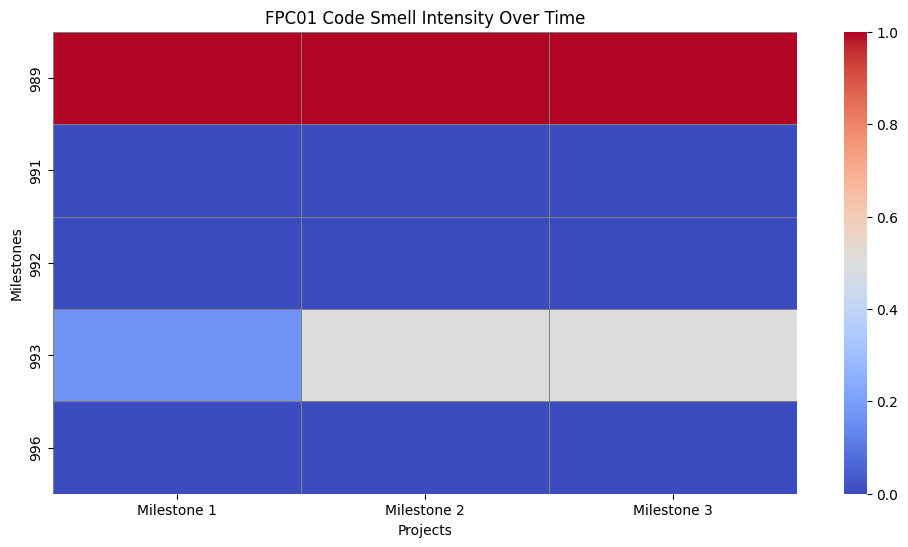

In [17]:
# Normalize values to improve visualization
df_normalized = df_lcom / df_lcom.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Milestones")
plt.title("FPC01 Code Smell Intensity Over Time")

# Show plot
plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

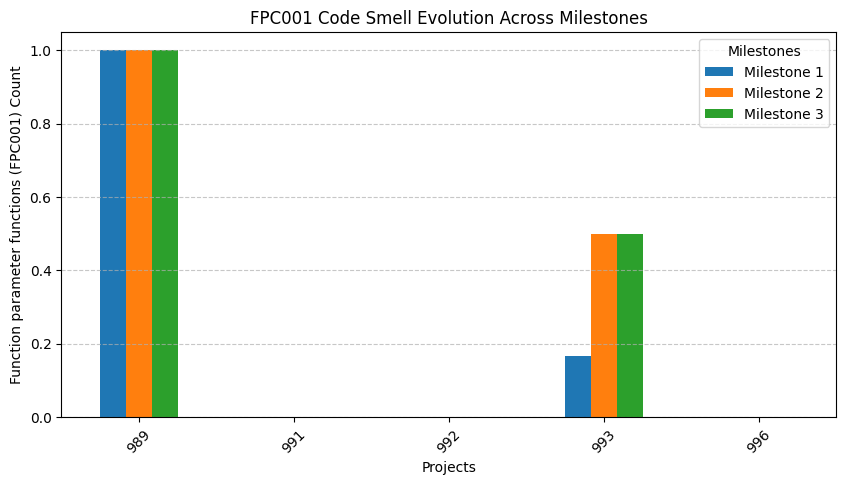

In [18]:
df_fpc = df_fpc / (df_fpc.max() - df_fpc.min())

# Plot
plt.figure(figsize=(10, 5))
df_fpc.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Function parameter functions (FPC001) Count")
plt.title("FPC001 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()